In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cowpea = pd.read_excel('../data/prepared.xlsx', sheet_name='Cowpea')
maize = pd.read_excel('../data/prepared.xlsx', sheet_name='Maize')
rice = pd.read_excel('../data/prepared.xlsx', sheet_name='Rice')
chickpea = pd.read_excel('../data/prepared.xlsx', sheet_name='Chickpea')
mustard = pd.read_excel('../data/prepared.xlsx', sheet_name='Mustard')

In [3]:
mustard['Date'] = pd.to_datetime(mustard['Date'])

In [4]:
X = []
y = []
# Assuming data is not missing
unique_dates = mustard['Date'].unique()
unique_times = mustard['Time'].unique()

for date in unique_dates:
    X.append(mustard[mustard['Date']==date][['GSR','CT']].values)
    y.append(mustard[mustard['Date']==date][['Rn']].values)

X = np.array(X)
y = np.ravel(y) # Flatten the y

In [5]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (22, 9, 2)
y shape: (198,)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input, TimeDistributed

In [7]:
model = Sequential()
model.add(Input(shape=[9, 2]))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(TimeDistributed(Dense(16)))
model.add(Dense(1))

In [8]:
print("Model input shape:", model.input_shape)
print("Model output shape:", model.output_shape)

Model input shape: (None, 9, 2)
Model output shape: (None, 9, 1)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [10]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 9, 16)             1216      
_________________________________________________________________
lstm_1 (LSTM)                (None, 9, 16)             2112      
_________________________________________________________________
time_distributed (TimeDistri (None, 9, 16)             272       
_________________________________________________________________
dense_1 (Dense)              (None, 9, 1)              17        
Total params: 3,617
Trainable params: 3,617
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X, y, validation_split=0.25, epochs=2000, batch_size=256, verbose=0)

In [12]:
print("Training loss:", history.history['loss'][-1])
print("Validation loss:", history.history['val_loss'][-1])

if 'root_mean_squared_error' in history.history.keys():
    print("Training loss:", history.history['root_mean_squared_error'][-1])
    print("Validation loss:", history.history['val_root_mean_squared_error'][-1])

Training loss: 12859.2470703125
Validation loss: 22031.6484375
Training loss: 113.39861297607422
Validation loss: 148.4306182861328


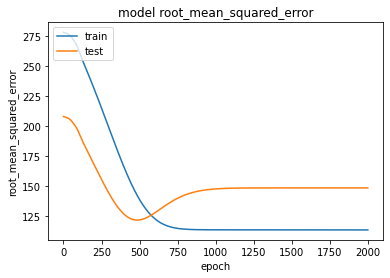

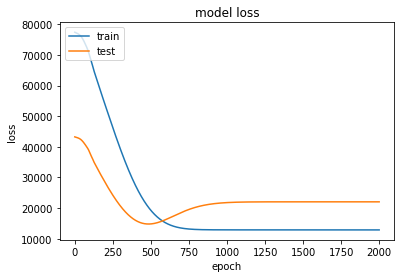

In [13]:
# summarize history for accuracy
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model root_mean_squared_error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()